In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [5]:
df = pd.read_csv("Maternal Health Risk Data Set.csv")
df.shape

(1014, 7)

In [6]:
# finding the columns with missing values
missing_values = df.isnull().sum()
missing_values

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [7]:
# find whether there duplicate rows
duplicates = df.duplicated().sum()
duplicates

562

In [23]:
# since there are duplicate rows we will remove them
df1 = df.drop_duplicates()
df1.shape


(452, 7)

In [9]:
df1['Age'].unique()

array([25, 35, 29, 30, 23, 32, 42, 19, 20, 48, 15, 50, 10, 40, 21, 18, 16,
       22, 49, 28, 12, 60, 55, 45, 31, 17, 26, 54, 44, 33, 13, 34, 38, 39,
       63, 14, 37, 51, 62, 43, 65, 66, 56, 70, 27, 36, 59, 24, 41, 46],
      dtype=int64)

In [10]:
df1['BodyTemp'].unique()

array([ 98. , 100. , 102. , 101. , 103. ,  98.4,  99. ,  98.6])

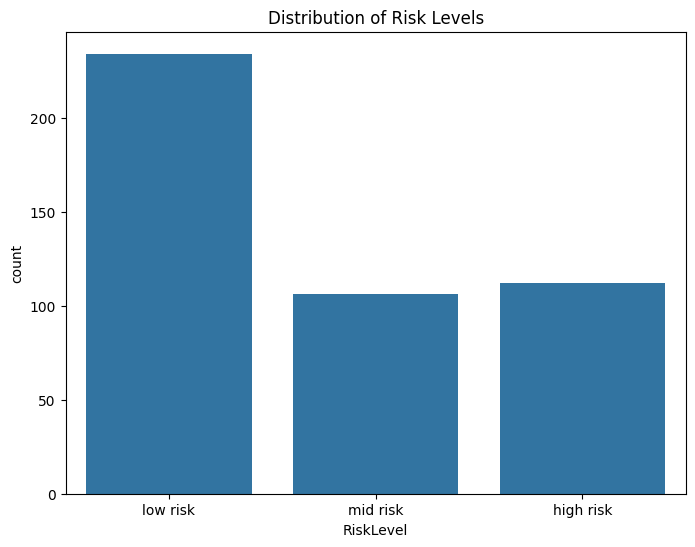

In [24]:
# count plot for the Risklevel column
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(data=df1, x='RiskLevel', order=['low risk', 'mid risk', 'high risk'])
plt.title('Distribution of Risk Levels')
plt.show()


In [25]:
#changing the RiskLevel column to numerical values
#pandas replace function
df1['RiskLevel'].replace(to_replace={'low risk': 0, 'mid risk': 1, 'high risk': 2}, inplace=True)
df1

C:\Users\NEERAJ\AppData\Local\Temp\ipykernel_18812\2989554143.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['RiskLevel'].replace(to_replace={'low risk': 0, 'mid risk': 1, 'high risk': 2}, inplace=True)


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0
...,...,...,...,...,...,...,...
673,12,100,50,6.4,98.0,70,1
674,15,100,60,6.0,98.0,80,0
703,15,100,49,7.6,98.0,77,0
704,12,100,50,6.0,98.0,70,1


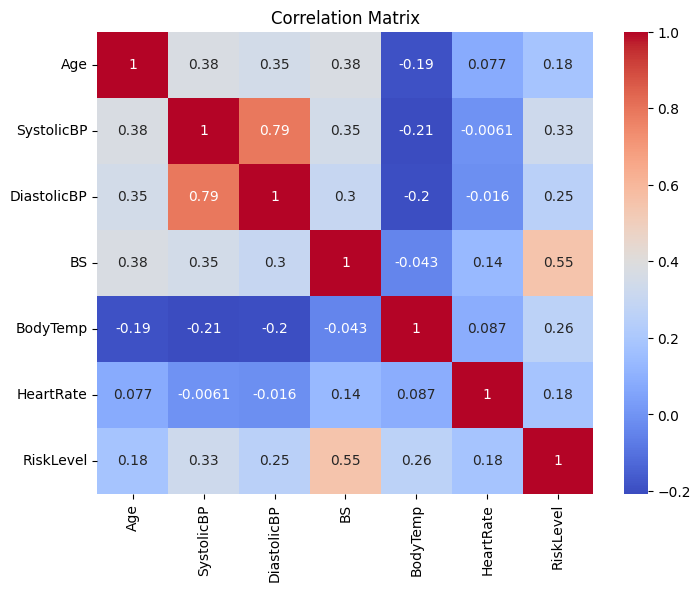

In [31]:
# drawing the correlation matrix
corr_matrix = df1.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

from the correlation matrix we can see that SystolicBP and DiastolicBP are highly correlated. We will drop one of them. We will drop DiastolicBP

In [59]:
# droping DiastolicBp column
df2 =df1.drop(['DiastolicBP'], axis=1)
df2

,Age,SystolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,15.0,98.0,86,2
1,35,140,13.0,98.0,70,2
2,29,90,8.0,100.0,80,2
3,30,140,7.0,98.0,70,2
4,35,120,6.1,98.0,76,0
...,...,...,...,...,...,...
673,12,100,6.4,98.0,70,1
674,15,100,6.0,98.0,80,0
703,15,100,7.6,98.0,77,0
704,12,100,6.0,98.0,70,1


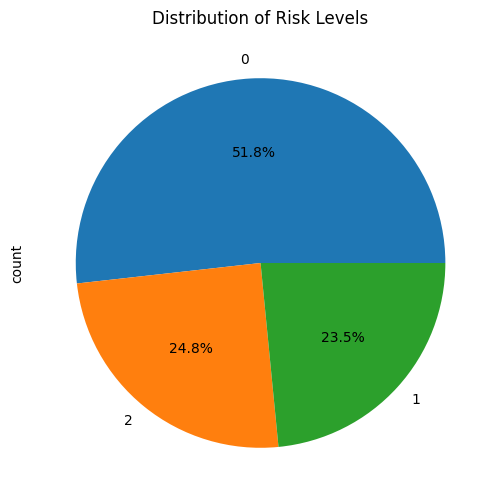

In [40]:
# plot the pie chart for the RiskLevel column
plt.figure(figsize=(8, 6))
df2['RiskLevel'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Risk Levels')
plt.show()

from the above we can say that the data is imbalanced. so we can under sample the data or over sample the data

In [60]:
X=df2.drop(['RiskLevel'],axis=1)
y=df2['RiskLevel']
y.value_counts()
df2

,Age,SystolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,15.0,98.0,86,2
1,35,140,13.0,98.0,70,2
2,29,90,8.0,100.0,80,2
3,30,140,7.0,98.0,70,2
4,35,120,6.1,98.0,76,0
...,...,...,...,...,...,...
673,12,100,6.4,98.0,70,1
674,15,100,6.0,98.0,80,0
703,15,100,7.6,98.0,77,0
704,12,100,6.0,98.0,70,1


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [43]:

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [100,200,300],
            'max_depth': [None, 10, 20, 30],  
            'min_samples_split': [2, 5, 10],  
            'min_samples_leaf': [1, 2, 4]  
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [44]:
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    print(f"Best parameters for {model_name} are: {clf.best_params_}")
    print(f"Best score for {model_name} is: {clf.best_score_}")
    print(f"Best estimator for {model_name} is: {clf.best_estimator_}")
    y_pred = clf.predict(X_test)
    print(f"Accuracy for {model_name} is: {accuracy_score(y_test, y_pred)}")
    print("\n")

Best parameters for svm are: {'C': 10, 'kernel': 'linear'}
Best score for svm is: 0.6732115677321157
Best estimator for svm is: SVC(C=10, gamma='auto', kernel='linear')
Accuracy for svm is: 0.5824175824175825


Best parameters for random_forest are: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best score for random_forest is: 0.7479071537290716
Best estimator for random_forest is: RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=10)
Accuracy for random_forest is: 0.7032967032967034


Best parameters for logistic_regression are: {'C': 5}
Best score for logistic_regression is: 0.6593987823439879
Best estimator for logistic_regression is: LogisticRegression(C=5, solver='liblinear')
Accuracy for logistic_regression is: 0.6153846153846154




In [49]:
from imblearn.over_sampling import SMOTE

In [63]:
x=df2.iloc[:,df2.columns!='RiskLevel']
Y=df2.iloc[:,df2.columns=='RiskLevel']
sm=SMOTE()


,RiskLevel
0,2
1,2
2,2
3,2
4,0
...,...
673,1
674,0
703,0
704,1


In [64]:
x_resample,Y_resample=sm.fit_resample(x,Y.values.ravel())
Y_resample=pd.DataFrame(Y_resample)
x_resample=pd.DataFrame(x_resample)
df2 = pd.concat([x_resample, Y_resample], axis=1)
df2.set_axis([*df2.columns[:-1], 'RiskLevel'], axis=1)
df2.head()

,Age,SystolicBP,BS,BodyTemp,HeartRate,0
0,25,130,15.0,98.0,86,2
1,35,140,13.0,98.0,70,2
2,29,90,8.0,100.0,80,2
3,30,140,7.0,98.0,70,2
4,35,120,6.1,98.0,76,0


In [66]:
df2.rename(columns={0: 'RiskLevel'}, inplace=True)

print(df2.columns)

Index(['Age', 'SystolicBP', 'BS', 'BodyTemp', 'HeartRate', 'RiskLevel'], dtype='object')


In [67]:
X=df2.drop(['RiskLevel'],axis=1)
y=df2['RiskLevel']

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score



rf = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)


grid_search.fit(X, y)

best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_


best_rf.fit(X, y)


y_pred = best_rf.predict(X)  


accuracy = accuracy_score(y, y_pred)
print("Tuned Random Forest Accuracy: {:.2f}%".format(accuracy * 100))


print("Best Hyperparameters:", best_params)


Tuned Random Forest Accuracy: 91.17%
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
